<a href="https://colab.research.google.com/github/AngelRosalesContreras/Practica_3_2/blob/main/Practica_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

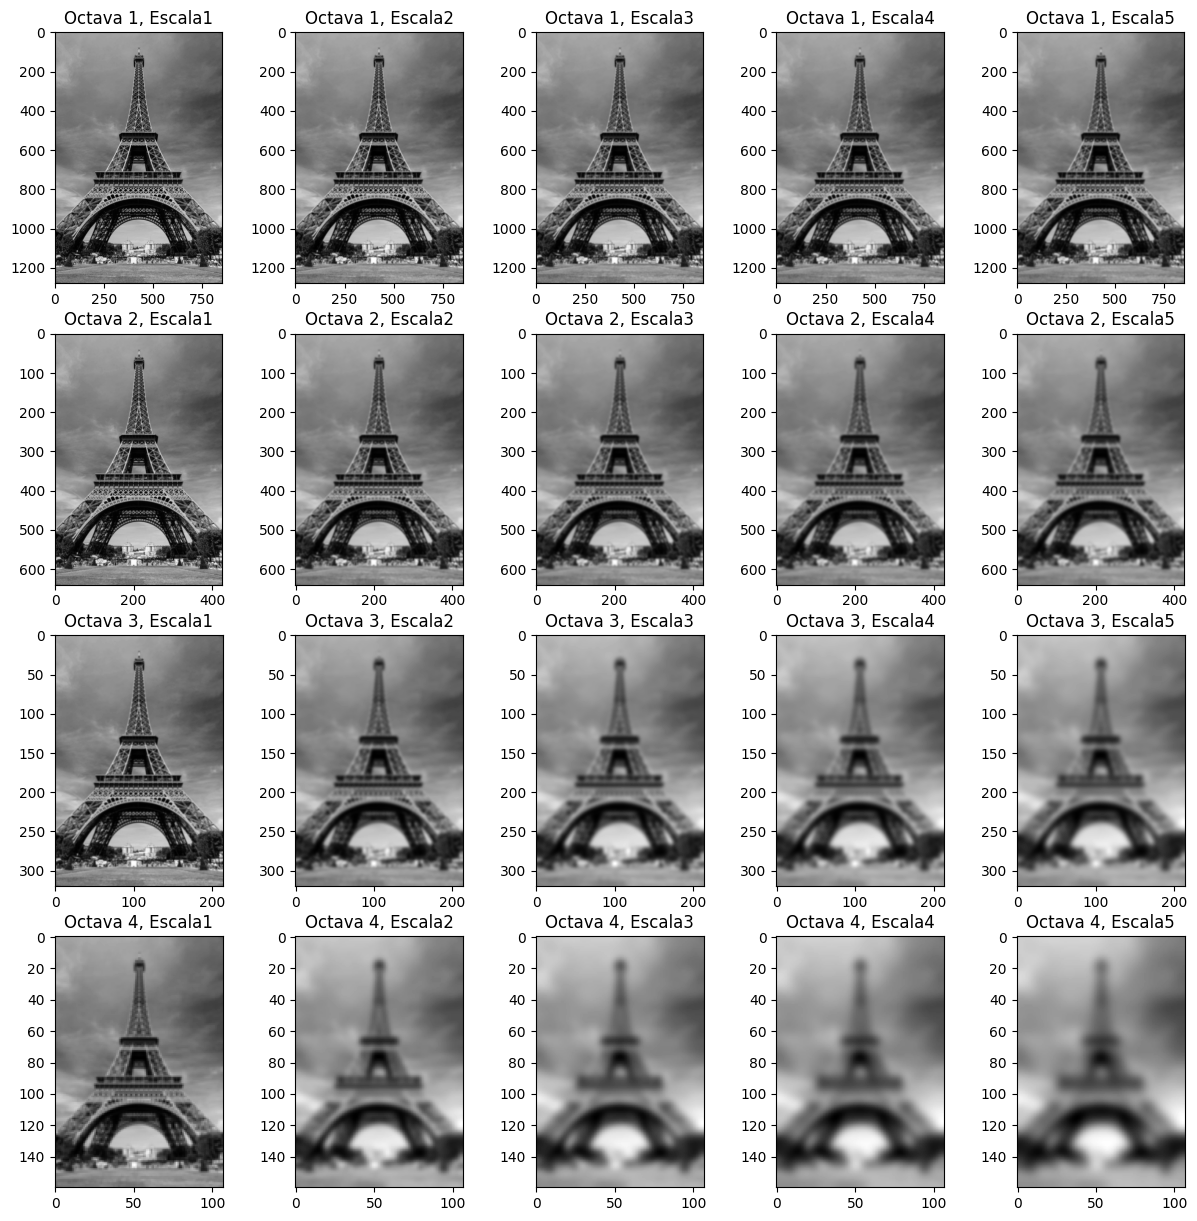

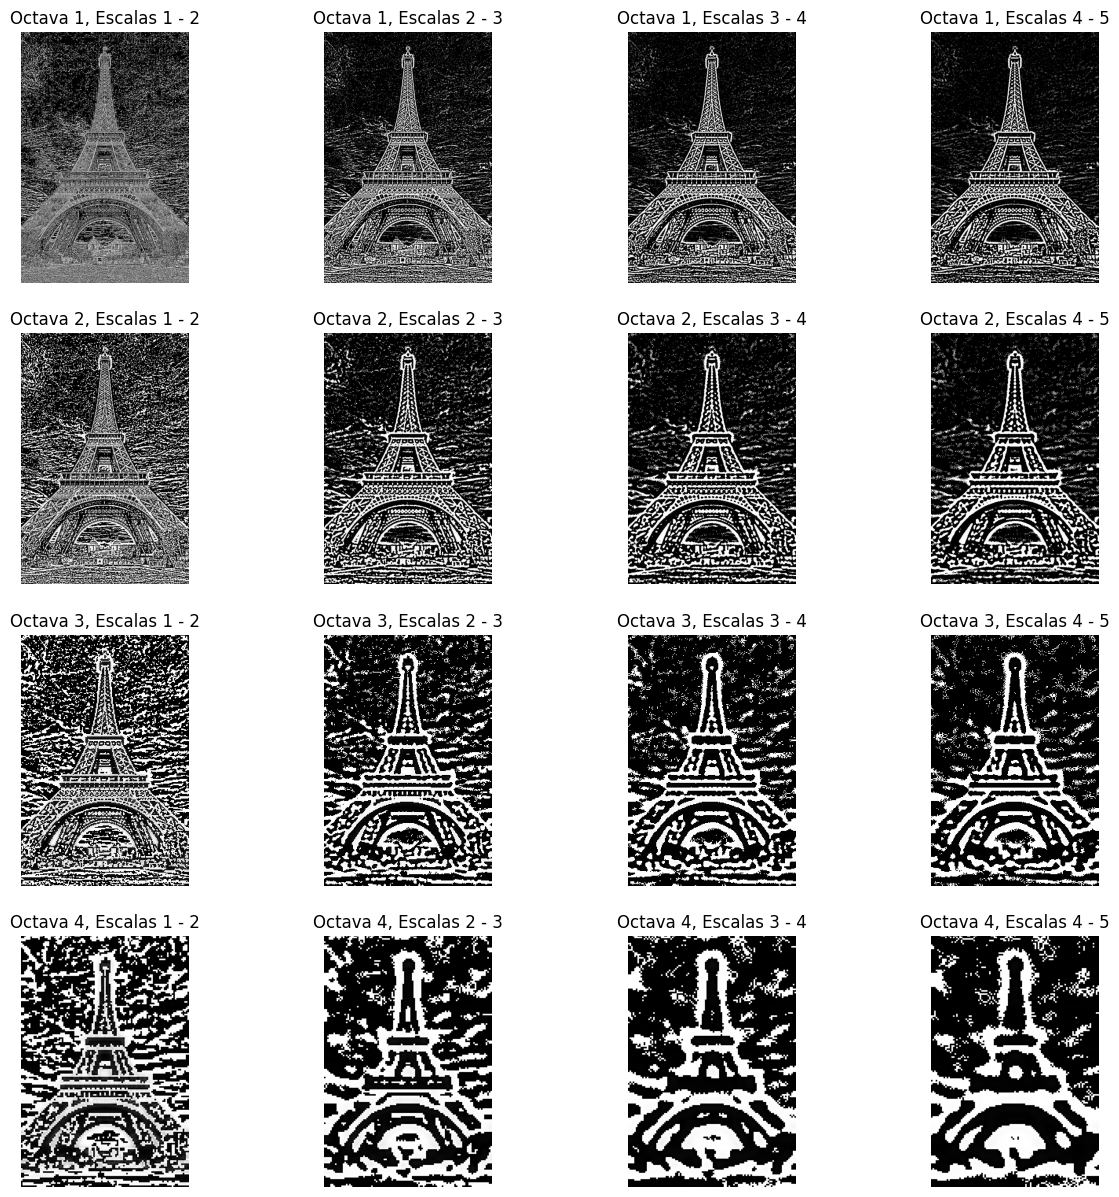

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def build_scale_space(image, num_octaves, num_scales, sigma):
    scale_space = []

    for octave in range(num_octaves):
        octave_images = []
        base = image.copy()

        for scale in range(num_scales):
            # Agregar la imagen a la escala actual
            octave_images.append(base)

            # Aplica la descomposición de escala
            base = cv2.GaussianBlur(base, (0, 0), sigmaX=sigma)

            # Actualiza el valor de sigma para la siguiente iteración
            #sigma = sigma * 2.0 if scale == 0 else sigma * np.sqrt(2)

        scale_space.append(octave_images)

        # Redimensiona la imagen para la siguiente octava
        image = cv2.pyrDown(image)

    return scale_space



def build_difference_of_gaussians(scale_space):
    dog_space = []

    scales_used = []  # Lista para almacenar la información sobre las escalas utilizadas

    for octave, octave_images in enumerate(scale_space):
        dog_octave = []
        for i in range(len(octave_images) - 1):
            difference = octave_images[i + 1] - octave_images[i]
            dog_octave.append(difference)

            # Almacena la información sobre las escalas utilizadas
            scales_used.append((octave + 1, i + 1, i + 2))

        dog_space.append(dog_octave)

    return dog_space, scales_used


def visualize_scale_space(scale_space):
    fig, axs = plt.subplots(len(scale_space), len(scale_space[0]), figsize=(15, 15))

    for octave, images in enumerate(scale_space):
        for scale, image in enumerate(images):
            axs[octave, scale].imshow(image, cmap='gray')
            axs[octave, scale].set_title(f'Octava {octave + 1}, Escala{scale + 1}')
            axs[octave, scale].axis('on')

    plt.show()

def visualize_difference_of_gaussians(dog_space, scales_used):
    fig, axs = plt.subplots(len(dog_space), len(dog_space[0]), figsize=(15, 15))

    for octave, images in enumerate(dog_space):
        for scale, image in enumerate(images):
            plt.subplot(len(dog_space), len(images), octave * len(images) + scale + 1)
            plt.imshow(image, cmap='gray')

            # Obtener la información sobre las escalas para esta imagen
            scale_info = scales_used[octave * len(images) + scale]
            plt.title(f'Octava {scale_info[0]}, Escalas {scale_info[1]} - {scale_info[2]}')
            plt.axis('off')

    plt.show()


# Cargar una imagen de ejemplo
image_path = 'uno.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Construir el espacio de escalas con parámetros personalizables
scale_space = build_scale_space(image, num_octaves=4, num_scales=5, sigma=1.6)

# Visualizar el espacio de escalas
visualize_scale_space(scale_space)

# Construir el espacio de diferencia de gaussianas y obtener la información sobre las escalas
dog_space, scales_used = build_difference_of_gaussians(scale_space)

# Visualizar el espacio de diferencia de gaussianas con información sobre las escalas
visualize_difference_of_gaussians(dog_space, scales_used)
